<h1> Supply Chain Modeling Experiments

# <h2> Simchi Levi ST Model

This first model is one that implements Simchi Levi et al (2015) research for Ford. It is a single tier version that accounts for the last stage of a supply-chain's cycle. The formal linear optimization problem is noted by the following image:

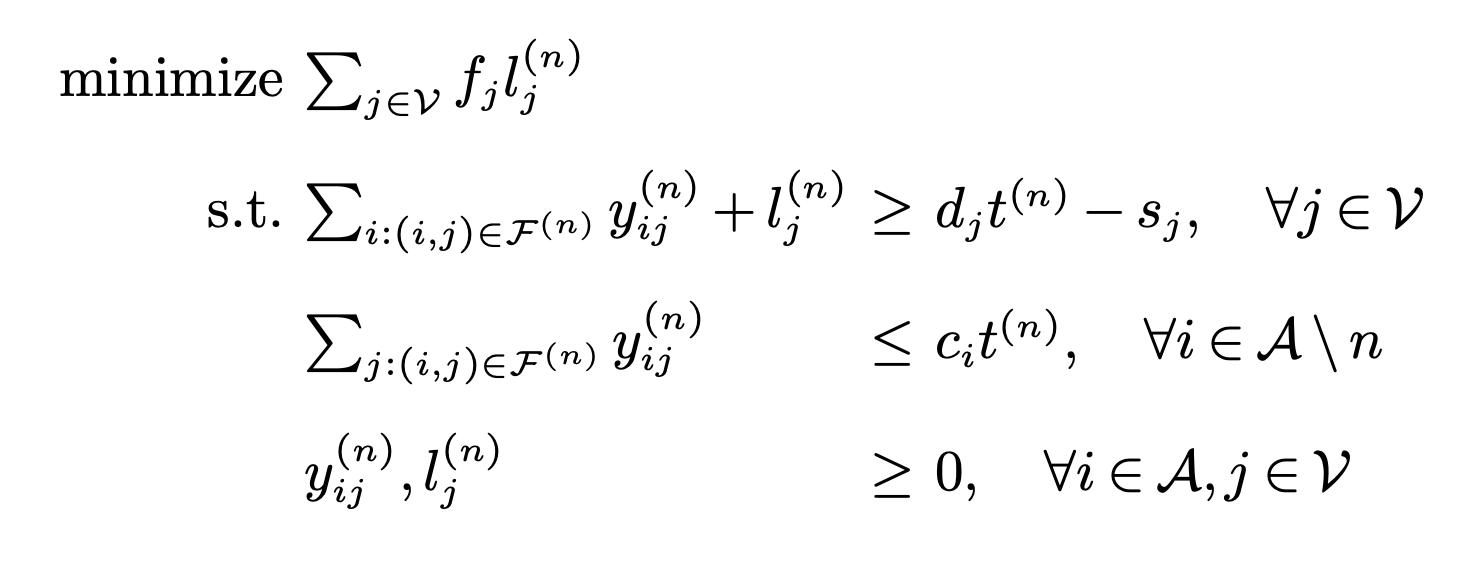




In [2]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 80.4 MB/s eta 0:00:00


In [3]:
from pulp import *
# Define the supply chain graph

# We analize a simple single tier SC model,
# Our supply chain graph consisting of 3-index tuples,
# in the format (node A, node B, flow of material from A->B)
graph = [
    ('Car warehouse1', 'Car Retailer 1', 10),
    ('Car warehouse2', 'Car Retailer 1', 5)
]

# we have an inventory with the structure {Node: Amount}
inv = {'Car Retailer 1': 3}
# Our demand is similarly defined as inventory, with the structure {Node: Amount}
demand = {'Car Retailer 1': 19}

# Since Simchi-Levis model is concerned with minimizing some performance measure,
# We define us as the profit margin per product.
profit_margin = 10

# Create a linear programming problem, we want to minimize the the amount of lost demand * profit_margin
model = LpProblem("Minimize_Lost_Demand", LpMinimize)

# Define decision variables FLOW and INV
flow = LpVariable.dicts("Flow", ((i, j) for i, j, _ in graph), lowBound=0, cat='Integer')
inventory = LpVariable.dicts("Inventory", (k for k, _ in inv.items()), lowBound=0, cat='Integer')

# Objective function: minimize lost demand
lj = sum((demand[j] - sum(flow[(i, j)] for i, _, _ in graph) - sum(inventory[j] for _ in inv)) for j in demand)
model += lj * profit_margin, "Lost_Demand"


## CONSTRAINTS
for products in demand: # our slack variable must account to some value
  model += sum(flow[(i, j)] for i, j, _ in graph if j == products) + lj >= demand[products] - inv[products], f"Production_{products}"

for edge in graph: # we cant send more than what our edges allow us
  model += sum(flow[(i, j)] for i, j, _ in graph if (i, j) == (edge[0], edge[1])) <= edge[2], f"Capacity_{edge[0]}_{edge[1]}"

model += lj >= 0
## CONSTRAINTS


# Solve the linear programming problem
model.solve()

# Print the results
print(f" Our objective value is: {model.objective.value()}\n")

# for var in model.variables():
#     print(f"{var.name} = {var.value()}")

 Our objective value is: 10.0

